# Building a Neural Network

## Architecture of a simple neural network

The typical structure of a feed-forward neural network is as follows:

<img src="../images/structure-network.png" width="400px" alt="" align="left">
<br clear="all" />

The hidden level/layer is used to transform the input layer values into values in a higher-dimensional space, so that we can learn more features from the input. The hidden layer transforms the output as follows:

<img src="../images/hidden-layer.png" width="400px" alt="" align="left">
<br clear="all" />

Note that `w1,w2,...,wn` are the weights given to each of the input variables. If `a` is one of the units in the hidden layer, it will be equal to the following:

\begin{equation}
a=f\left(\sum_{i=0}^{N} w_{i} x_{i}\right)
\end{equation}

The `f` function is the activation function that is used to apply non-linearity on top of the sum-product of the input and their corresponding weight values. Additionally, higher non-linearity can be achieved by having more than one hidden layer.

In sum, a neural network is a collection of weights assigned to nodes with layers connecting them. Note that you can have `n` hidden layers, with the term **deep learning** implying multiple hidden layers.

## Training a neural network
Training a neural network basically means calibrating all of the weights in a neural network by repeating two key steps: forward-propagation and back-propagation.

In *forward-propagation*, we apply a set of weights to the input data, pass it through the hidden layer, perform the nonlinear activation on the hidden layer output, and then connect the hidden layer to the output layer by multiplying the hidden layer node values with another set of weights. For the first forward-propagation, the values of the weights are initialized randomly.

In *back-propagation*, we try to decrease the error by measuring the margin of error of output and then adjust weight accordingly. Neural networks repeat both forward- and back-propagation to predict an output until the weights are calibrated.

## Applications of a neural network

Neural networks can be architected in multiple ways. Here are some of the possible ways:

<img src="../images/architecture-network.png" width="600px" alt="" align="left">
<br clear="all" />

The box at the bottom is the input, followed by the hidden layer (the middle box), and the box at the top is the output layer.

## Feed-forward propagation from scratch in Python 

### Getting ready

<img src="../images/net1.png" width="400px" alt="" align="left">
<br clear="all" />

### Calculating the hidden layer unit values
We now assign weights to all of the connections. Note that these weights are selected randomly (based on Gaussian distribution) since it is the first time we're forward-propagating. 

<img src="../images/net2.png" width="400px" alt="" align="left">
<br clear="all" />

In the next step, we perform the multiplication of the input with weights to calculate the values of hidden units in the hidden layer.

<img src="../images/net3.png" width="400px" alt="" align="left">
<br clear="all" />

### Applying the activation function
Now, we will pass the hidden layer values through an activation function so that we attain non-linearity in our output. The different activation functions are as follows:

<img src="../images/activation-func.png" width="500px" alt="" align="left">
<br clear="all" />

For our example, let’s use the *sigmoid* function for activation. The sigmoid function looks like this, graphically:

<img src="../images/sigmoid.png" width="300px" alt="" align="left">
<br clear="all" />

By applying sigmoid activation to the three hidden layer *sums*, we get the following:

<img src="../images/net4.png" width="400px" alt="" align="left">
<br clear="all" />

### Calculating the output layered values
We perform the sum product of the hidden layer values and weight values to calculate the output value. For simplicity, we excluded the bias terms that need to be added at each unit of the hidden layer:

<img src="../images/net5.png" width="400px" alt="" align="left">
<br clear="all" />

### Calculating the loss values 
Typically, when the variable is a continuous one, the loss value is calculated as the squared error, that is, we try to minimize the mean squared error by varying the weight values associated with the neural network:

\begin{equation}
J(\theta)=\frac{1}{m} \sum_{i=1}^{m}\left(h(\theta)\left(x^{(i)}\right)-y^{(i)}\right)^{2}
\end{equation}

In the preceding equation, $y$ is the actual value of output, $h(x)$ is the transformation that we apply on the input $x$ to obtain a predicted value of $y$, and $m$ is the number of rows in the dataset.

### How to do it...

A function to calculate the squared error loss values across all data points is as follows:

In [46]:
import numpy as np
def feed_forward(inputs, outputs, weights):
     pre_hidden = np.dot(inputs,weights[0])+weights[1]        
     hidden = 1/(1+np.exp(-pre_hidden))
     out = np.dot(hidden,weights[2])+weights[3]
     squared_error = (np.square(out-outputs))
     return squared_error

We calculate the hidden layer values by performing the matrix multiplication (dot product) of the input and weights. Additionally, we add the bias values in the hidden layer, as follows:
<div class="alert alert-block alert-warning">
<tt>pre_hidden = np.dot(inputs,weights[0])+weights[1]</tt>
</div>

We perform activation on top of the hidden layer values, as follows:
<div class="alert alert-block alert-warning">
<tt>hidden = 1/(1+np.exp(-pre_hidden))</tt>
</div>

We now calculate the output at the hidden layer by multiplying the output of the hidden layer with weights that connect the hidden layer to the output, and then adding the bias term at the output, as follows:
<div class="alert alert-block alert-warning">
<tt>out = np.dot(hidden,weights[2])+weights[3]</tt>
</div>

In the preceding code, `out` is the predicted output and `outputs` is the actual output.

While we considered the sigmoid activation on top of the hidden layer values in the preceding code, let's examine other activation functions that are commonly used.

#### Tanh
The tanh activation of a value (the hidden layer unit value) is calculated as follows:
<div class="alert alert-block alert-warning">
<tt>def tanh(x):<br>
&nbsp;&nbsp;&nbsp;&nbsp;return (exp(x)-exp(-x))/(exp(x)+exp(-x)) 
</tt>
</div>

#### Linear
The linear activation of a value is the value itself.

#### Softmax
Typically, softmax is performed on top of a vector of values. This is generally done to determine the probability of an input belonging to one of the `n` number of the possible output classes in a given scenario. Let's say we are trying to classify an image of a digit into one of the possible 10 classes (numbers from 0 to 9). 

The softmax activation is used to provide a probability value for each class in the output and is calculated as follows: 
<div class="alert alert-block alert-warning">
<tt>def softmax(x):<br>
&nbsp;&nbsp;&nbsp;&nbsp;return np.exp(x)/np.sum(np.exp(x)) 
</tt>
</div>

Apart from the preceding activation functions, the loss functions that are generally used while building a neural network are:

#### Mean squared error
The error is the difference between the actual `y` and predicted `p` values of the output: 
<div class="alert alert-block alert-warning">
<tt>def mse(p, y):<br>
&nbsp;&nbsp;&nbsp;&nbsp;return np.mean(np.square(p - y)) 
</tt>
</div>

The mean squared error is typically used when trying to predict a value that is continuous in nature.

#### Categorical cross-entropy
Cross-entropy is a measure of the difference between two different distributions: actual `y` and predicted `p`. It is applied to categorical (discrete) output data:

\begin{equation}
-\left(y \log_{2} p+(1-y) \log_{2}(1-p)\right)
\end{equation}

It is implemented as follows:
<div class="alert alert-block alert-warning">
<tt>def cat_cross_entropy(p, y):<br>
&nbsp;&nbsp;&nbsp;&nbsp;return -np.sum(y*np.log2(p)+(1-y)*np.log2(1-p)) 
</tt>
</div>

## Back propagation from scratch in Python

### Getting ready
In *forward* propagation, we connected the input layer to the hidden layer to the output layer. In *back* propagation, we take the reverse approach.

A change in the weight value will have an impact on the final loss value (either increasing or decreasing loss). We'll update the weight in the direction of decreasing loss. By updating the weights by a small amount and measuring the change in error that the update in weights leads to, we are able to do the following:
* Determine the direction of the weight update
* Determine the magnitude of the weight update

**Back propagation** works as follows:
* Calculates the overall cost function from the feed-forward process.
* Varies all the weights (one at a time) by a small amount. 
* Calculates the impact of the variation of weight on the cost function.
* Depending on whether the change has an increased or decreased the cost (loss) value, it updates the weight value in the direction of loss decrease. And then repeats this step across all the weights we have. 

If the preceding steps are performed `n` number of times, it essentially results in `n` **epochs**.

### How to do it...
In this section, we will build the back-propagation algorithm by hand so that we clearly understand how weights are calculated in a neural network. In this specific case, we will build a simple neural network where there is no hidden layer (thus we are solving a regression equation).

1. Initialize the dataset as follows:

In [47]:
x = [[1],[2],[3],[4]]
y = [[2],[4],[6],[8]]

2. Initialize the weight and bias values randomly (we have only one weight and one bias value as we are trying to identify the optimal values of $a$ and $b$ in the $y = a\cdot x + b$ equation):

In [48]:
w = [1.5, 0.]

3. Define the feed-forward network and calculate the squared error loss value:

In [49]:
import numpy as np
def feed_forward(inputs, outputs, weights):
    out = np.dot(inputs,weights[0]) + weights[1]
    squared_error = (np.square(out - outputs))
    return squared_error

4. Increase each weight and bias value by a very small amount (0.0001) and calculate the squared error loss value one at a time for each of the weight and bias updates. 

   If the squared error loss value decreases as the weight increases, the weight value should be increased. The magnitude by which the weight value should be increased is proportional to the amount of loss decrease (weigh it down with a factor called *learning rate*).
   
   In the following code, we create a function which performs the back propagation process to update weights:

In [50]:
from copy import deepcopy
def update_weights(inputs, outputs, weights, epochs):  
    for epoch in range(epochs):
        org_loss = feed_forward(inputs, outputs, weights)  
        wts_tmp = deepcopy(weights)
        wts_tmp2 = deepcopy(weights)
        for ix, wt in enumerate(weights): 
            wts_tmp[-(ix+1)] += 0.0001
            # print('wts_tmp:', wts_tmp)
            loss = feed_forward(inputs, outputs, wts_tmp)
            # print('loss', loss)
            delta_loss = np.sum(org_loss - loss)/(0.0001*len(inputs))
            wts_tmp2[-(ix+1)] += delta_loss*0.01
            wts_tmp = deepcopy(weights)

        weights = deepcopy(wts_tmp2)
    return wts_tmp2

We use `deepcopy` so that the value of the original variable does not change when the variable to which the original variable's values are copied has its values changed.

Loop through all the weight values, one at a time, and change them by a small value (0.0001):
<div class="alert alert-block alert-warning">
<tt>wts_tmp[-(ix+1)] += 0.0001</tt>
</div>

Calculate the updated feed-forward loss when the weight is updated by a small amount. Then calculating its impact on loss value is equivalent to performing a derivative with respect to change in weight:
<div class="alert alert-block alert-warning">
<tt>loss = feed_forward(inputs, outputs, wts_tmp)<br>
delta_loss = np.sum(org_loss-loss)/(0.0001*len(inputs))
</tt>  
</div>  

Update the weights by the change in loss that they are causing. Update the weights slowly by multiplying the change in loss by a very small number (0.01), which is the *learning rate* parameter:
<div class="alert alert-block alert-warning">
<tt>wts_tmp2[-(ix+1)] += delta_loss*0.01</tt>
</div>

And now, Run!

In [51]:
update_weights(x,y,w,1)

[1.5749925000000138, 0.024998999999971405]

In [52]:
w_val = []
b_val = []
for k in range(100):
    w_new, b_new = update_weights(x,y,w,(k+1))
    w_val.append(w_new)
    b_val.append(b_new)

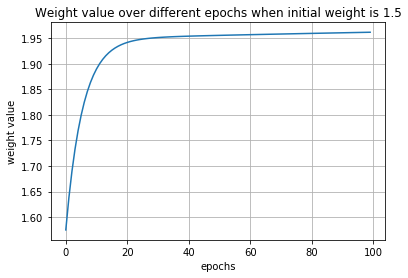

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(w_val)
plt.title('Weight value over different epochs when initial weight is 1.5')
plt.xlabel('epochs')
plt.ylabel('weight value')
plt.grid('off')

In [3]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())